<a href="https://colab.research.google.com/github/spaceo521/Data-Science-Projects/blob/main/Scouting%20project_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem statement

**Best** Pinch hitters in Powerplay in IPL (min 20 innings)
- Player Analysis
- Team Analysis
- Batting evaluation(ranking) for particular role

### Keywords : Pinch hitter, Powerplay, IPL
- Pinch Hitter: High SR, Low balls_per_boundary, Decent runs and balls faced
- Powerplay: 1-6
- Hitting ability
- Runs scoring ability


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [ ]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')

In [ ]:
df = deliveries.copy()

In [ ]:
df.columns.unique()

Index(['Unnamed: 0', 'matchId', 'inning', 'over_ball', 'over', 'ball',
       'batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes',
       'Penalty', 'dismissal_kind', 'player_dismissed'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matches = pd.read_csv('matches_updated_mens_ipl.csv')
mdf = matches.copy()

In [ ]:
mdf.head()

,Unnamed: 0,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591
1,1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592
2,2,NaN,Indian Premier League,2017-04-07,male,K Srinivasan,Gujarat Lions,Kolkata Knight Riders,CK Nandan,V Narayan Kutty,2017,Kolkata Knight Riders,NaN,6,CA Lynn,NaN,NaN,Saurashtra Cricket Association Stadium,NaN,field,Rajkot,YC Barde,NaN,Kolkata Knight Riders,Nitin Menon,3.0,NaN,10.0,1082593
3,3,NaN,Indian Premier League,2017-04-08,male,R Pandit,Kings XI Punjab,Kings XI Punjab,C Shamshuddin,Chinmay Sharma,2017,Rising Pune Supergiant,NaN,6,GJ Maxwell,NaN,NaN,Holkar Cricket Stadium,NaN,field,Indore,KN Ananthapadmanabhan,NaN,Kings XI Punjab,AK Chaudhary,4.0,NaN,6.0,1082594
4,4,NaN,Indian Premier League,2017-04-08,male,Navdeep Singh,Royal Challengers Bangalore,Royal Challengers Bangalore,VK Sharma,J Srinath,2017,Delhi Daredevils,15.0,6,KM Jadhav,NaN,NaN,M.Chinnaswamy Stadium,NaN,bat,Bengaluru,A Nand Kishore,NaN,Royal Challengers Bangalore,S Ravi,5.0,NaN,NaN,1082595


### Terminolgy used
- BPB
- BPD
- SR
- RPI

### Part 1: Player statistics


In [ ]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1

def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1

In [ ]:
def playerStats(df):
    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)

    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs' : 'runs'})
    balls = pd.DataFrame(df.groupby('batsman')['matchId'].count()).reset_index().rename(columns = {'matchId' : 'balls'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'matchId' : 'innings'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed' : 'dismissals'})

    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot' : 'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne' : 'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo' : 'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree' : 'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour' : 'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix' : 'sixes'})

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman')


    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']), axis = 1)

    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], x['fours'] + x['sixes']), axis = 1)

    return df

In [ ]:
df = playerStats(deliveries)

In [ ]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,ones,twos,threes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,16,15,83,20,1,142.857143,12.173913,13.066667,6.322581
1,A Badoni,11,161,139,9,57,11,7,53,11,0,115.827338,14.636364,15.444444,7.722222
2,A Chandila,2,4,7,1,3,0,0,4,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,7,0,21,2,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,1,1,13,1,0,125.000000,8.333333,10.000000,10.000000


### Performance in phases of play

In [ ]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [ ]:
deliveries['phase'] = deliveries['over'].apply(lambda x: phase(x))

In [ ]:
def phasesofplay(df, current_phase):

    df = df[df.phase == current_phase]
    df.reset_index(inplace = True, drop = True)

    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)

    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby('batsman')['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs' : 'runs'})
    balls = pd.DataFrame(df.groupby('batsman')['matchId'].count()).reset_index().rename(columns = {'matchId' : 'balls'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x))))).reset_index().rename(columns = {'matchId' : 'innings'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed' : 'dismissals'})

    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot' : 'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne' : 'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo' : 'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree' : 'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour' : 'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix' : 'sixes'})

    df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman')


    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)

    df['RPI'] = df.apply(lambda x: (x['runs']/x['innings']), axis = 1)

    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)

    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], x['fours'] + x['sixes']), axis = 1)

    return df

In [ ]:
pp_df = phasesofplay(deliveries, 'Powerplay')
mid_df = phasesofplay(deliveries, 'Middle')
dth_df = phasesofplay(deliveries, 'Death')

In [ ]:
pp_df.head()

,batsman,innings,runs,balls,dismissals,dots,fours,sixes,ones,twos,threes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,1,0,0,71.428571,5.0,7.0,7.00
1,A Badoni,2,2,9,1,7,0,0,2,0,0,22.222222,1.0,9.0,9.00
2,A Chopra,5,29,45,2,28,4,0,13,0,0,64.444444,5.8,22.5,11.25
3,A Flintoff,1,15,16,0,11,1,1,2,0,1,93.750000,15.0,16.0,8.00
4,A Manohar,2,13,14,1,7,2,0,5,0,0,92.857143,6.5,14.0,7.00


### Satty scale

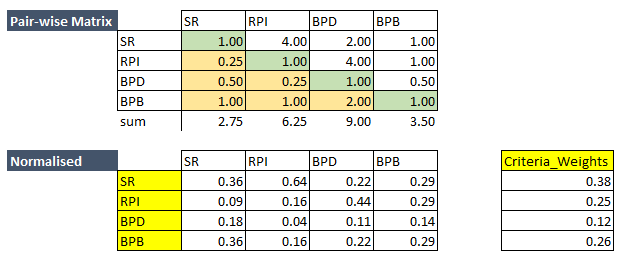

In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.38, 0.25, 0.12, 0.26

Filter by min of 20 innings

In [ ]:
pp_df = pp_df[pp_df.innings >= 20 ]
pp_df.reset_index(inplace = True, drop = True)

## TOPIS Method

### Calculation - Normalizing all values to same dimensions

In [ ]:
#step1: square of all values
pp_df['calc_SR'] = pp_df['SR'].apply(lambda x: x*x)
pp_df['calc_RPI'] = pp_df['RPI'].apply(lambda x: x*x)
pp_df['calc_BPD'] = pp_df['BPD'].apply(lambda x: x*x)
pp_df['calc_BPB'] = pp_df['BPB'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_BPB = np.sqrt(pp_df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_BPB']].sum(axis = 0))

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x/sq_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x/sq_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x/sq_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x/sq_BPB)

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x*wt_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x*wt_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x*wt_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x*wt_bpb)

best_sr, worst_sr = max(pp_df['calc_SR']), min(pp_df['calc_SR'])
best_rpi, worst_rpi = max(pp_df['calc_RPI']), min(pp_df['calc_RPI'])
best_bpd, worst_bpd = max(pp_df['calc_BPD']), min(pp_df['calc_BPD'])
best_BPB, worst_BPB = min(pp_df['calc_BPB']), max(pp_df['calc_BPB'])

### Calculation - Comparision against the best & worst values

In [ ]:
pp_df['dev_best_SR'] = pp_df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
pp_df['dev_best_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
pp_df['dev_best_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
pp_df['dev_best_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-best_BPB)*(x-best_BPB))

pp_df['dev_best_sqrt'] = pp_df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_BPB'], axis = 1)

pp_df['dev_worst_SR'] = pp_df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
pp_df['dev_worst_RPI'] = pp_df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
pp_df['dev_worst_BPD'] = pp_df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
pp_df['dev_worst_BPB'] = pp_df['calc_BPB'].apply(lambda x: (x-worst_BPB)*(x-worst_BPB))

pp_df['dev_worst_sqrt'] = pp_df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_BPB'], axis = 1)

### Final Step - Overall score for each player ( values from 0 - 1)

In [ ]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [ ]:
pp_df[['batsman', 'innings', 'runs', 'balls', 'dismissals', 'BPB','score']].sort_values(by = 'score', ascending = False).reset_index(drop = True).head(10)

,batsman,innings,runs,balls,dismissals,BPB,score
0,SP Narine,42,688,419,36,3.325397,0.937582
1,CA Lynn,40,875,623,19,4.209459,0.752522
2,JM Bairstow,36,747,537,19,4.401639,0.719423
3,PP Shaw,63,1192,857,42,4.394872,0.705692
4,V Sehwag,103,1785,1284,69,4.237624,0.700276
5,YK Pathan,48,473,340,15,4.473684,0.697606
6,JC Buttler,62,1361,997,29,4.431111,0.682439
7,RA Tripathi,52,883,650,26,4.779412,0.646815
8,E Lewis,22,432,320,14,4.571429,0.630968
9,YBK Jaiswal,23,406,302,14,4.441176,0.615158


Conclusion

- The above result shows Top 10 pinch hitters in IPL considering min of 20 innings

- Sunil Narine tops the list of best pinch hitter in IPL. The second plays goes to Chris Lynn